## Extracting OSA Vowels Spectrograms

### 1. Import Necessary Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa
from PIL import Image, ImageOps

### 2. Read the Excel File into a DataFrame

In [2]:
df = pd.read_excel('.\DATA\OSA_DB_UPM_Vowels_Recordings_with_duration_sample_rate_BMI.xlsx')

In [3]:
df.head(2)

,Patient,Gender,IAH,Weight,Age,Height,Cervical,wav_file,vowel,duration,sample_rate,BMI
0,P0004,hombre,19.7,78,39,168,42,LB4_F5R1.wav,a,3.125034,22050,27.636054
1,P0004,hombre,19.7,78,39,168,42,LB4_F6R1.wav,e,2.500000,22050,27.636054


### 3. Read and explore some recordings

Audio shape: (50000,)
Sampling rate: 16000
Audio duration: 3.125 seconds


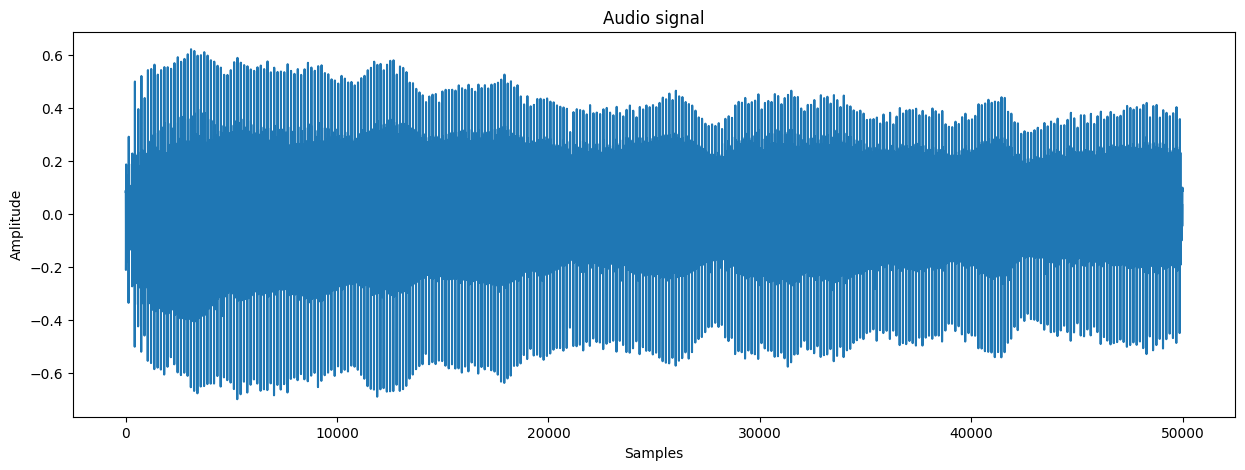

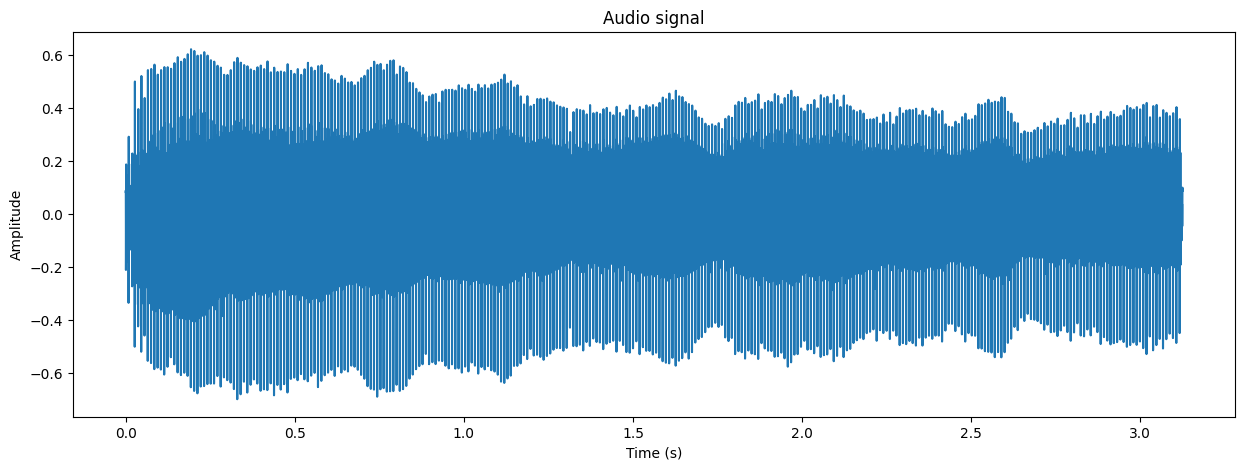

In [7]:
# audio_directory is the path to your vowels audio files directory
audio_directory = 'D:\OSA_CaseStudy\DATA\SPEECH_VOWELS'

# Read one audio file
row = 0
audio_file_path = os.path.join(audio_directory, df['wav_file'][row])
audio, sr = librosa.load(audio_file_path, sr=None)

print(f'Audio shape: {audio.shape}')
print(f'Sampling rate: {sr}')
print(f'Audio duration: {audio.shape[0] / sr} seconds')

# Plot the audio signal
plt.figure(figsize=(15, 5))
plt.plot(audio)
plt.title('Audio signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

# Plot the audio signal with time
plt.figure(figsize=(15, 5))
plt.plot(np.arange(audio.shape[0]) / sr, audio)
plt.title('Audio signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()



In [8]:
# Play the audio
import IPython.display as ipd
ipd.Audio(audio_file_path)


### 4. Some features automatically suggested by Copilot

Zero Crossing Rate shape: (98,)


Text(0, 0.5, 'Zero Crossing Rate')

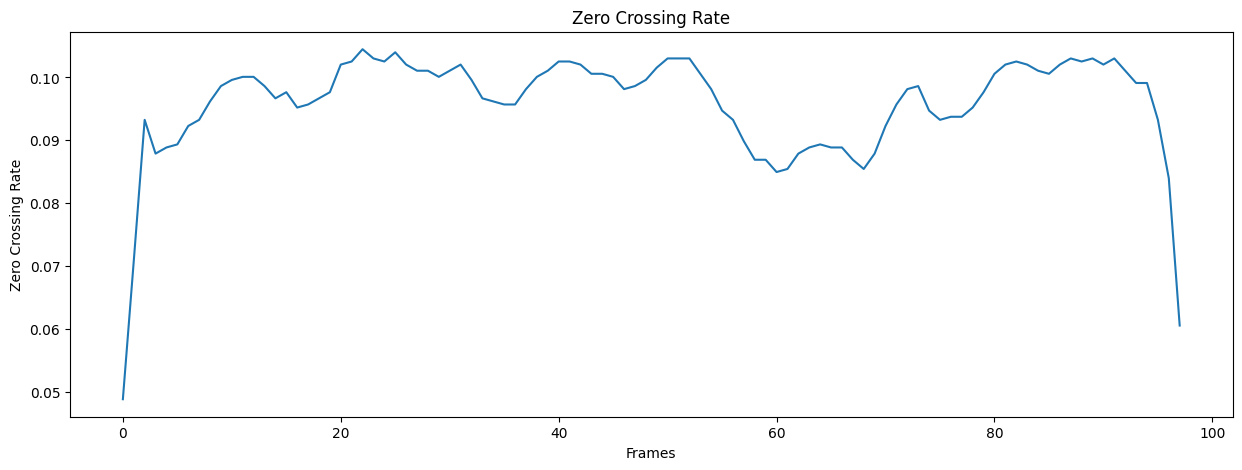

In [27]:
# Extract features from the audio signal
# Zero Crossing Rate
zcr = librosa.feature.zero_crossing_rate(audio)
zcr = zcr[0]
print(f'Zero Crossing Rate shape: {zcr.shape}')
plt.figure(figsize=(15, 5))
plt.plot(zcr)
plt.title('Zero Crossing Rate')
plt.xlabel('Frames')
plt.ylabel('Zero Crossing Rate')


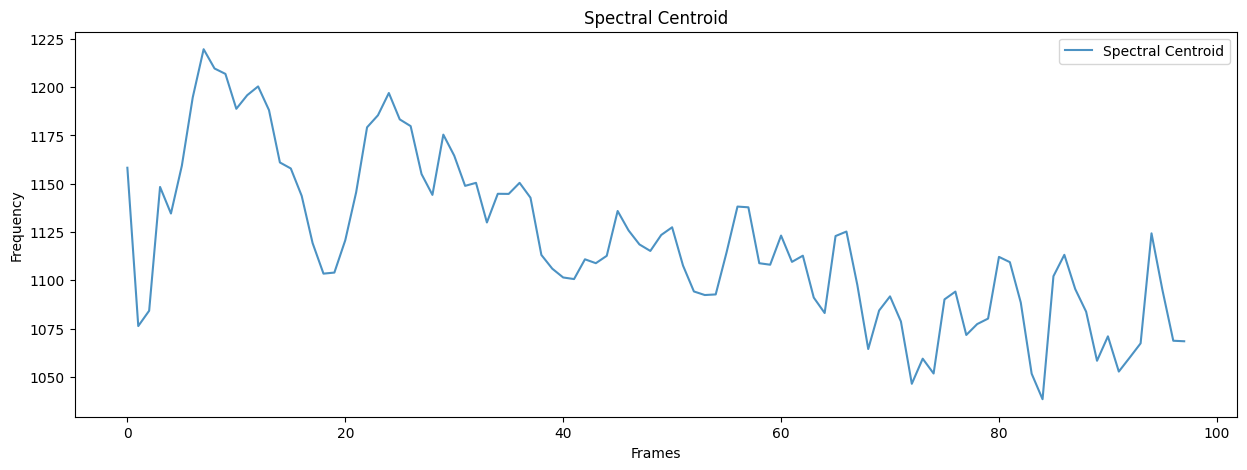

In [30]:
# Spectral Centroid
spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)[0]
plt.figure(figsize=(15, 5))
plt.plot(spectral_centroids, alpha=0.8, label='Spectral Centroid')
plt.title('Spectral Centroid')
plt.xlabel('Frames')
plt.ylabel('Frequency') # Hz
plt.legend(loc='upper right')
plt.show()



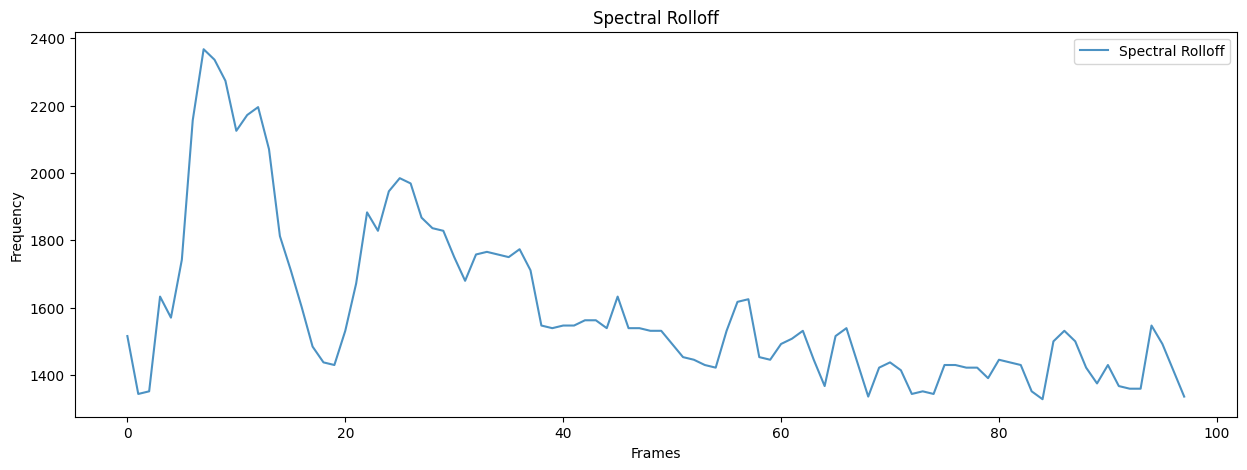

In [31]:
# Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)[0]
plt.figure(figsize=(15, 5))
plt.plot(spectral_rolloff, alpha=0.8, label='Spectral Rolloff')
plt.title('Spectral Rolloff')
plt.xlabel('Frames')
plt.ylabel('Frequency') # Hz
plt.legend(loc='upper right')
plt.show()


MFCCs shape: (20, 98)


Text(0, 0.5, 'MFCCs')

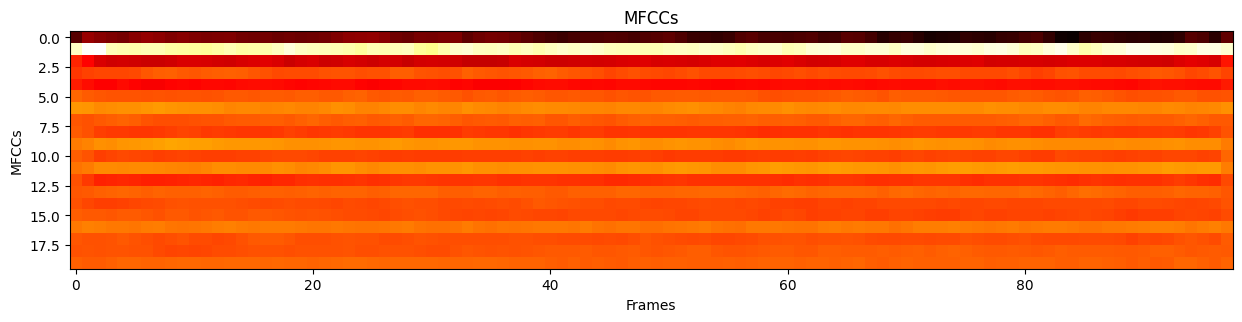

In [33]:
# Mel-Frequency Cepstral Coefficients
mfccs = librosa.feature.mfcc(y=audio, sr=sr)
print(f'MFCCs shape: {mfccs.shape}')
plt.figure(figsize=(15, 5))
plt.imshow(mfccs, cmap='hot', interpolation='nearest')
plt.title('MFCCs')
plt.xlabel('Frames')
plt.ylabel('MFCCs')


Chroma shape: (12, 98)


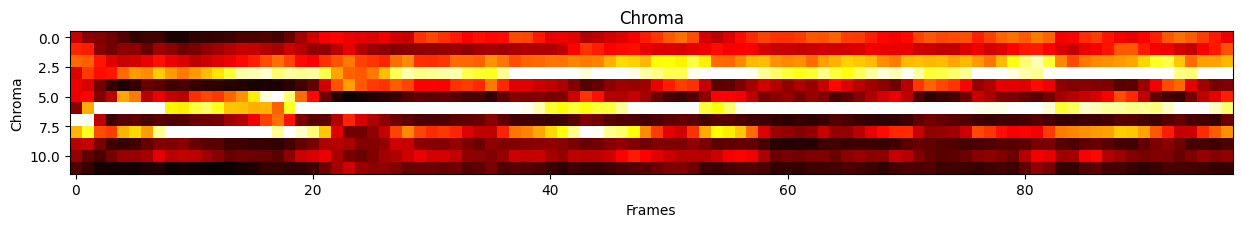

In [35]:
# Chroma feature
chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
print(f'Chroma shape: {chroma.shape}')
plt.figure(figsize=(15, 5))
plt.imshow(chroma, cmap='hot', interpolation='nearest')
plt.title('Chroma')
plt.xlabel('Frames')
plt.ylabel('Chroma')
plt.show()



### 5. We are going to focus on the Mel-Spectrogram

Spectrogram shape: (1025, 98)


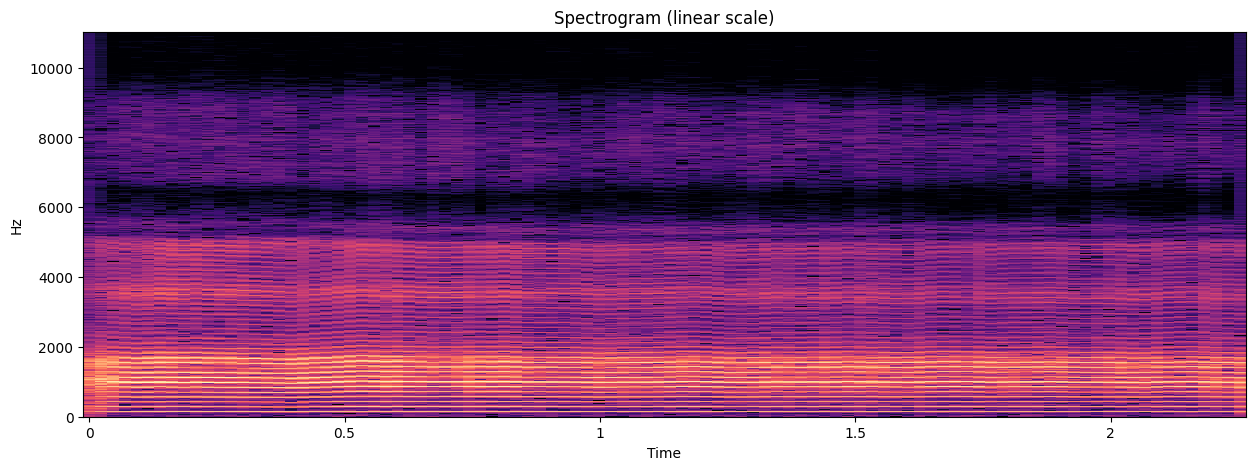

In [42]:
# Spectrogram (linear scale - frequency)
spectrogram = np.abs(librosa.stft(audio))
print(f'Spectrogram shape: {spectrogram.shape}')
plt.figure(figsize=(15, 5))
plt.title('Spectrogram (linear scale)')
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), y_axis='linear', x_axis='time')

Spectrogram shape: (1025, 98)


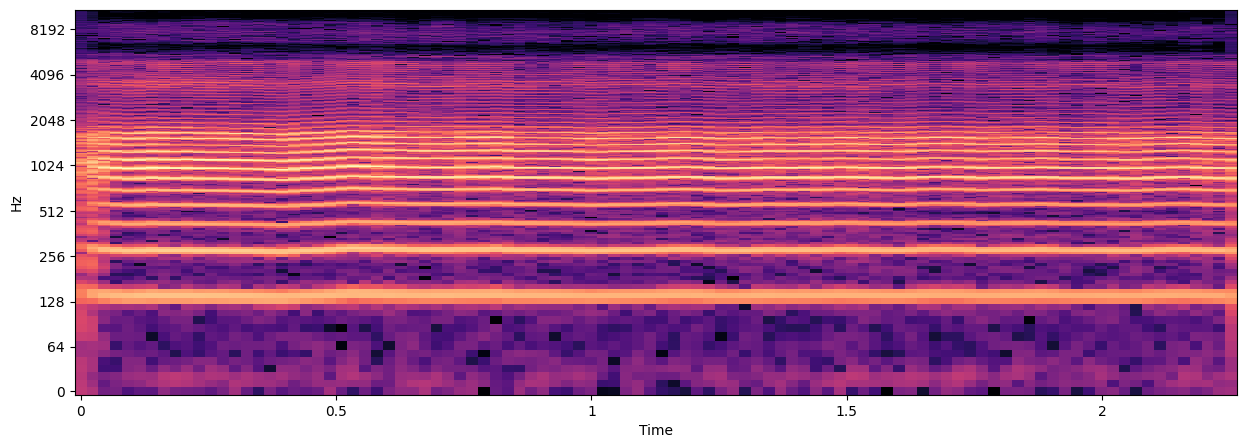

In [37]:
# Spectrogram (log scale - frequency)
spectrogram = np.abs(librosa.stft(audio))
print(f'Spectrogram shape: {spectrogram.shape}')
plt.figure(figsize=(15, 5))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), y_axis='log', x_axis='time')


Mel Spectrogram shape: (128, 98)


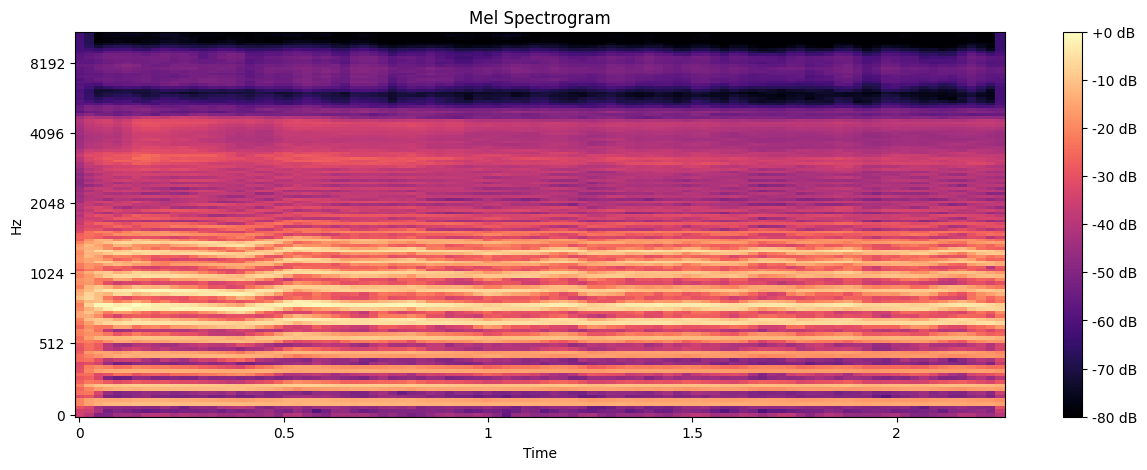

In [43]:
# Mel Spectrogram (128 bands - default)
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
print(f'Mel Spectrogram shape: {mel_spectrogram.shape}')
plt.figure(figsize=(15, 5))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()


### 6. Dealing with different lenghts

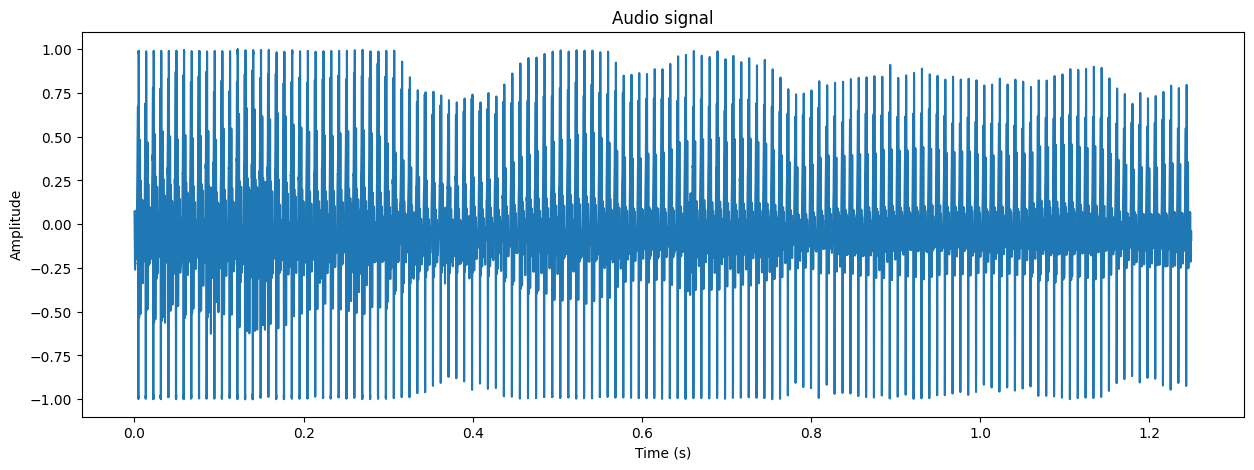

In [44]:
# Select the wav file with shortest duration in the dataset
shortest_duration_row = df['duration'].idxmin()
shortest_duration_audio_file_path = os.path.join(audio_directory, df['wav_file'][shortest_duration_row])
shortest_duration_audio, sr = librosa.load(shortest_duration_audio_file_path, sr=None)

# Plot the audio signal with x axis in time
plt.figure(figsize=(15, 5))
plt.plot(np.arange(shortest_duration_audio.shape[0]) / sr, shortest_duration_audio)
plt.title('Audio signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Play the audio
ipd.Audio(shortest_duration_audio_file_path)


Mel Spectrogram shape: (128, 40)


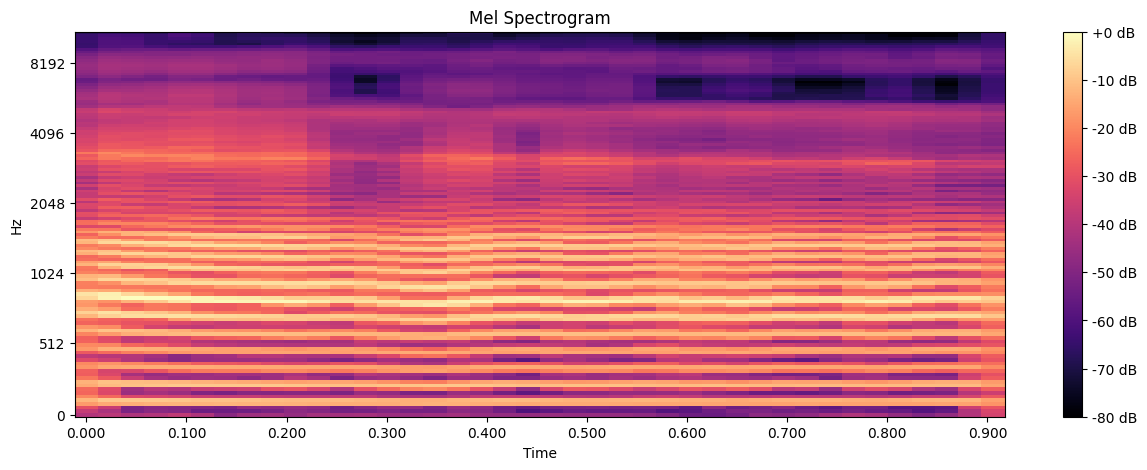

In [46]:
# plot the Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=shortest_duration_audio, sr=sr)
print(f'Mel Spectrogram shape: {mel_spectrogram.shape}')
plt.figure(figsize=(15, 5))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()


* Proposed approach for equal size mel-spectrograms

In [60]:
# Number of frames for 2 sec audio using Mel-spectrogram default hop_length
hop_length = 512
number_samples_2sec = 2*sr
n_frames = number_samples_2sec  // hop_length + 1
print(f'Number of frames: {n_frames}')

Number of frames: 63


Mel Spectrogram shape: (128, 40)
Mel Spectrogram 63 shape: (128, 63)


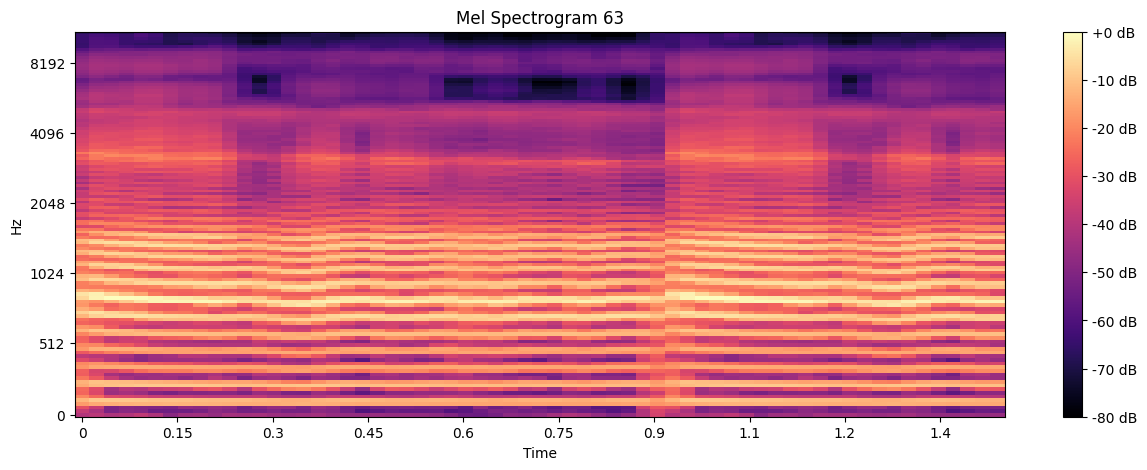

In [71]:
# Case 1: Take an audio file with a duration less than 2 seconds
audio_file_path = os.path.join(audio_directory, df['wav_file'][shortest_duration_row])
audio, sr = librosa.load(audio_file_path, sr=None)

# Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
print(f'Mel Spectrogram shape: {mel_spectrogram.shape}')

n_frames = 63
# create a mel_spectrogram_63 array with 63 frames from the mel_spectrogram inserting

# number of frames to add to the mel_spectrogram
n_frames_to_add = 63 - mel_spectrogram.shape[1]

# take the first n_frames_to_add frames from the mel_spectrogram
mel_spectrogram_63 = np.hstack((mel_spectrogram, mel_spectrogram[:, :n_frames_to_add]))
print(f'Mel Spectrogram 63 shape: {mel_spectrogram_63.shape}')
plt.figure(figsize=(15, 5))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram_63, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram 63')
plt.show()




Mel Spectrogram shape: (128, 63)


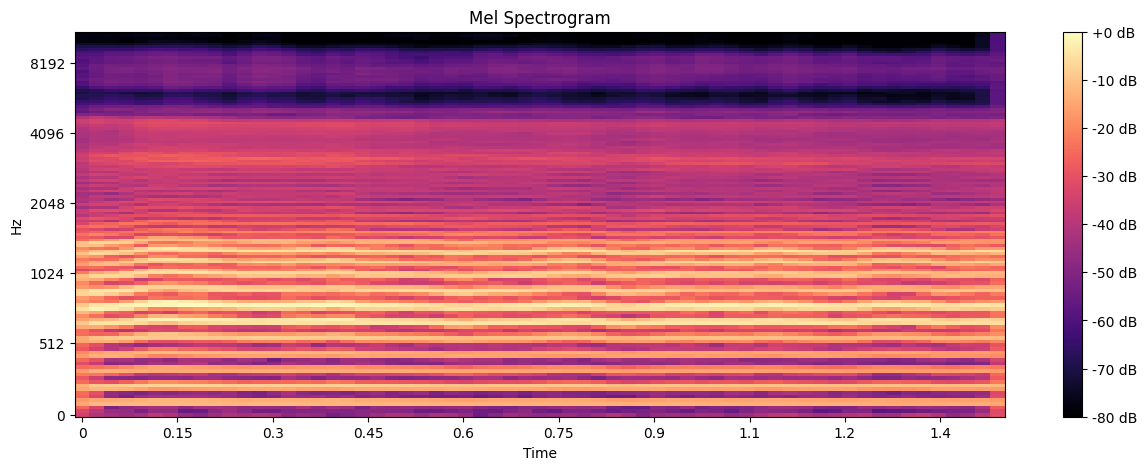

In [83]:
# Case 2: Take an audio file with a duration higher than 2 seconds
row = 0
audio_file_path = os.path.join(audio_directory, df['wav_file'][row])
audio, sr = librosa.load(audio_file_path, sr=None)

# take two seconds from the middle of the audio
start_frame = audio.shape[0] // 2 - number_samples_2sec // 2
end_frame = audio.shape[0] // 2 + number_samples_2sec // 2
audio_2sec = audio[start_frame:end_frame]

# Mel Spectrogram
mel_spectrogram_63 = librosa.feature.melspectrogram(y=audio_2sec, sr=sr)
print(f'Mel Spectrogram shape: {mel_spectrogram.shape}')

plt.figure(figsize=(15, 5))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram_63, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()


### 7. Save mel-spectrograms as png images 

In [100]:
# Assuming mel_spectrogram is already computed
spectrogram_db = librosa.power_to_db(mel_spectrogram_63, ref=np.max)

# Normalize the spectrogram to be in the range [0, 1]
normalized_spectrogram = (spectrogram_db - np.min(spectrogram_db)) / (np.max(spectrogram_db) - np.min(spectrogram_db))
normalized_spectrogram = (normalized_spectrogram * 255).astype(np.uint8)

# Invert the y-axis
normalized_spectrogram = np.flipud(normalized_spectrogram)

# Convert to PIL Image and save
img = Image.fromarray(normalized_spectrogram, mode='L')  # 'L' mode for grayscale
img.save('spectrogram.png')


Mel Spectrogram shape: (128, 63)


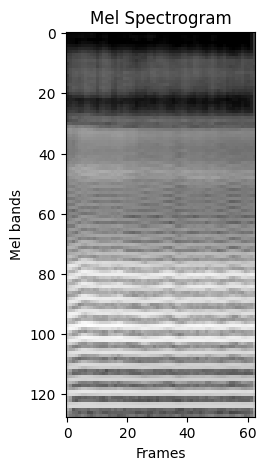

In [106]:
# read the image
img = Image.open('spectrogram.png')

mel_spectrograms_array = np.array(img)
print(f'Mel Spectrogram shape: {mel_spectrograms_array.shape}')

plt.figure(figsize=(15, 5))
plt.imshow(mel_spectrograms_array, cmap='gray', interpolation='nearest')
plt.title('Mel Spectrogram')
plt.xlabel('Frames')
plt.ylabel('Mel bands')
plt.show()



### 8. Process the whole Database and save mel-spectrograms

Output:
* Path D:\OSA_CaseStudy\DATA\VOWELS_MEL_SPECTROGRAM
* LB*_F[5-9]R1.png  (spectrogram images)


In [109]:
output_path = 'D:\OSA_CaseStudy\DATA\VOWELS_MEL_SPECTROGRAM'

number_samples_2sec = 2*sr
n_frames = 63

# Process all the audio files
for i in range(df.shape[0]):
    audio_file_path = os.path.join(audio_directory, df['wav_file'][i])
    
    image_output_path = os.path.join(output_path, f'{df["wav_file"][i].split(".")[0]}.png')
    
    audio, sr = librosa.load(audio_file_path, sr=None)
    # Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    
    # check the audio duration for different cases
    if audio.shape[0] < number_samples_2sec:
        # case 1: audio duration is less than 2 seconds
    
        # number of frames to add to the mel_spectrogram
        n_frames_to_add = 63 - mel_spectrogram.shape[1]
        # take the first n_frames_to_add frames from the mel_spectrogram
        mel_spectrogram_63 = np.hstack((mel_spectrogram, mel_spectrogram[:, :n_frames_to_add]))
        
    else:
        # case 2: audio duration is higher than 2 seconds
        start_frame = audio.shape[0] // 2 - number_samples_2sec // 2
        end_frame = audio.shape[0] // 2 + number_samples_2sec // 2
        audio_2sec = audio[start_frame:end_frame]
        mel_spectrogram_63 = librosa.feature.melspectrogram(y=audio_2sec, sr=sr)
        
    # Get the image from the mel_spectrogram
    spectrogram_db = librosa.power_to_db(mel_spectrogram_63, ref=np.max)

    # Normalize the spectrogram to be in the range [0, 1]
    normalized_spectrogram = (spectrogram_db - np.min(spectrogram_db)) / (np.max(spectrogram_db) - np.min(spectrogram_db))
    normalized_spectrogram = (normalized_spectrogram * 255).astype(np.uint8)

    # Invert the y-axis
    normalized_spectrogram = np.flipud(normalized_spectrogram)

    # Convert to PIL Image and save
    img = Image.fromarray(normalized_spectrogram, mode='L')  # 'L' mode for grayscale
    img.save(image_output_path)